<a href="https://colab.research.google.com/github/TbRaihan/3333210079_UAS_Analitika-Data/blob/main/Tubagus_Raihan_Ramadhan_3333210079_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.
Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.
Time series forecasting is the use of a model to predict future values based on previously observed values.

**Doge Coin**

Doge coin adalah salah satu jenis cryptocurrency, seperti Bitcoin dan Ethereum, yang diciptakan pada tahun 2013 oleh seorang programmer bernama Billy Markus dan dikembangkan secara terbuka dengan bantuan komunitas yang besar dan aktif. Doge coin ditandai dengan gambar seekor anjing Shiba Inu yang terkenal di internet. Meskipun asal mula doge coin hanyalah sebagai lelucon atau meme, namun hingga saat ini doge coin telah menjadi salah satu cryptocurrency yang populer di dunia.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import dataset**
dataset source : https://www.kaggle.com/datasets/neelgajare/dogecoin-historical-price-data?resource=download

In [2]:
# https://drive.google.com/file/d/1UrmY5r8TRiX1m5PMdJoHtdjS1bpX8fxN/view?usp=sharing

!gdown 1UrmY5r8TRiX1m5PMdJoHtdjS1bpX8fxN

Downloading...
From: https://drive.google.com/uc?id=1UrmY5r8TRiX1m5PMdJoHtdjS1bpX8fxN
To: /content/DOGE-USD (3).csv
100% 114k/114k [00:00<00:00, 81.4MB/s]


Mrngimport Doge Coin Historical Dataset

In [3]:
train_data = pd.read_csv('DOGE-USD (3).csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/11/2017,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,10/11/2017,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,11/11/2017,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,12/11/2017,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,13/11/2017,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


Berisikan rincian data pada dataset yang digunakan

Data date time digunakan sebagai forecasting

Data Open,High,Low,Close, dan Adj close merupakan fitur terkait harga jual barang

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1722 non-null   object 
 1   Open       1722 non-null   float64
 2   High       1722 non-null   float64
 3   Low        1722 non-null   float64
 4   Close      1722 non-null   float64
 5   Adj Close  1722 non-null   float64
 6   Volume     1722 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.3+ KB


Mengecek apakah ada missing value berdasarkan panjang data

In [5]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03
mean,0.059366,0.062913,0.055880,0.059412,0.059412,1.026996e+09
std,0.102425,0.110339,0.094707,0.102479,0.102479,3.602021e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002539,0.002607,0.002487,0.002538,0.002538,2.242436e+07
50%,0.003427,0.003550,0.003293,0.003423,0.003423,8.485071e+07
75%,0.070663,0.077721,0.068231,0.070731,0.070731,6.661201e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Mengecek statistical values berupa Mean, Median, Nilai Maximum, dan lainnya

Handle datetime data for time series

In [6]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

<ipython-input-6-1488af910503>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date'] = pd.to_datetime(train_data['Date'])


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-11,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-10-11,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-12-11,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


Membaca fitur date ke dalam date time agar menjadi format tipe data, setelah itu ubah index date time menjadi hari dan tanggal

**Explotory Data Analysis**

Visualisasikan Adjusted Close nya (Harga saat pasar tutup)

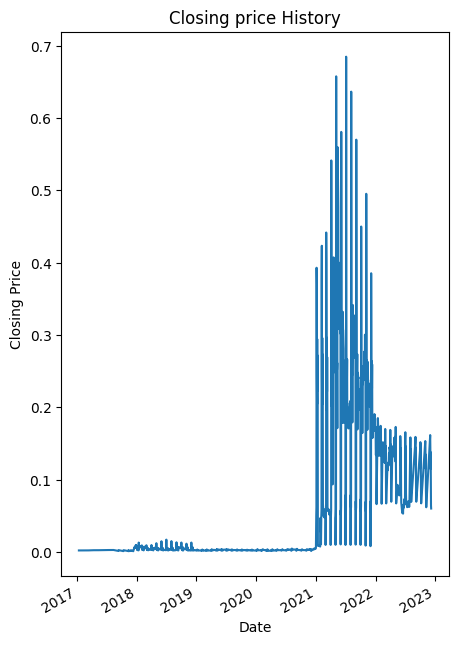

In [7]:
plt.figure(figsize=(5, 8)) # Resizing the plot
train_data['Adj Close'].plot()
plt.title ('Closing price History') # Adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Mengecek data pada tahun 2017 sampai 2023. Pada grafik terlihat bahwa tren mengalami kenaikan dan penurunan. kenaikan signifikan terjadi pada tahun 2021 dan mulai mengalami penurunan pada tahun 2022

<Figure size 1600x800 with 0 Axes>

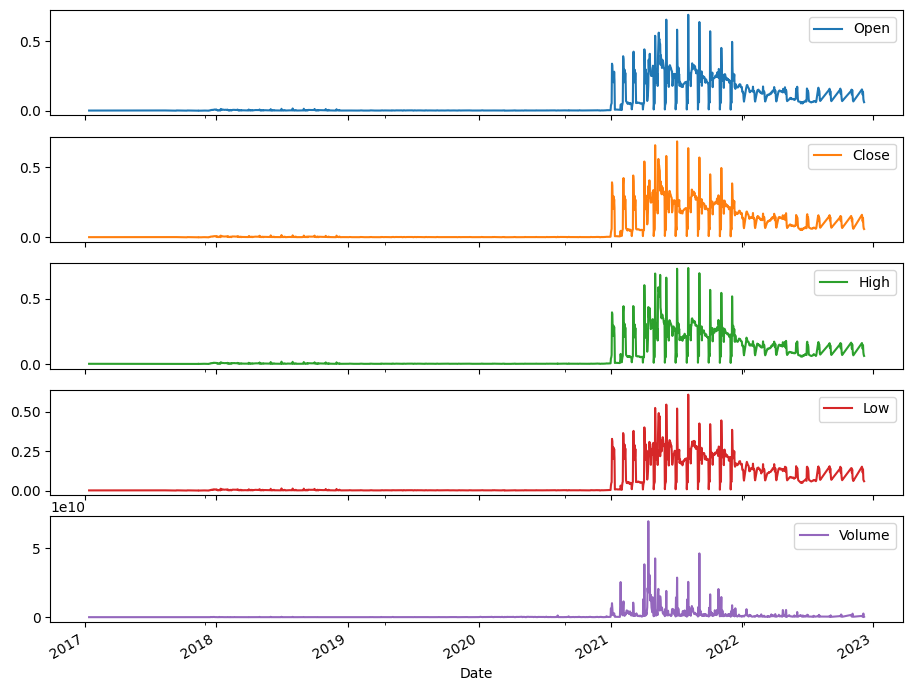

In [22]:
plt.figure(figsize=(16, 8)) # Resizing the plot
cols = ['Open', 'Close','High', 'Low', 'Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Mengecek tren harga untuk fitur lainnya seperti Open, Close, High, Low, dan Volume

In [23]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Membuat dua fitur baru yaitu fitur membaca data harga tertinggi dan terendah serta fitur harga penutupan dan pembukaan

In [10]:
df = train_data[['HL_PCT', 'Adj Close', 'Volume']]

Masukkan kedua fitur baru tadi di kedalam dataset

In [11]:
forecast_out = int(math.ceil(0.05 * len(df)))
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

87


<ipython-input-11-c5241f6f8d18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Mmebuat harga penutupan  sebagai label untuk memprediksi harga pada hari itu

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

memakai library sklearn untuk membuat model algortma data

In [13]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-13-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Menggunakan Scaler untuk menormalisasi data, agar range tidak terlalu jauh dan mengurangi bias

In [14]:
X_Predictions = X[-forecast_out:]
X = X[:-forecast_out]

In [15]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-15-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


memotong dataset untuk menentukan inputan adata X dan y

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset untuk train dan test data

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [24]:
lr_confidence

0.4918355207701207

In [18]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [25]:
rf_confidence

0.8804683204081899

Menggunakan model linear regression dan random forest untuk uji cobanya

In [19]:
last_date = df.index[-1]
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
forecast_set = rf.predict(X_Predictions)
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-19-9447877c13a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-19-9447877c13a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-19-9447877c13a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Menggambarkan langkah melakukan prediksi data masa depan dengan model Regressor Random Forest dan menyimpan hasil prediksi dalam dataframe serta menghasilkan waktu dalam detik

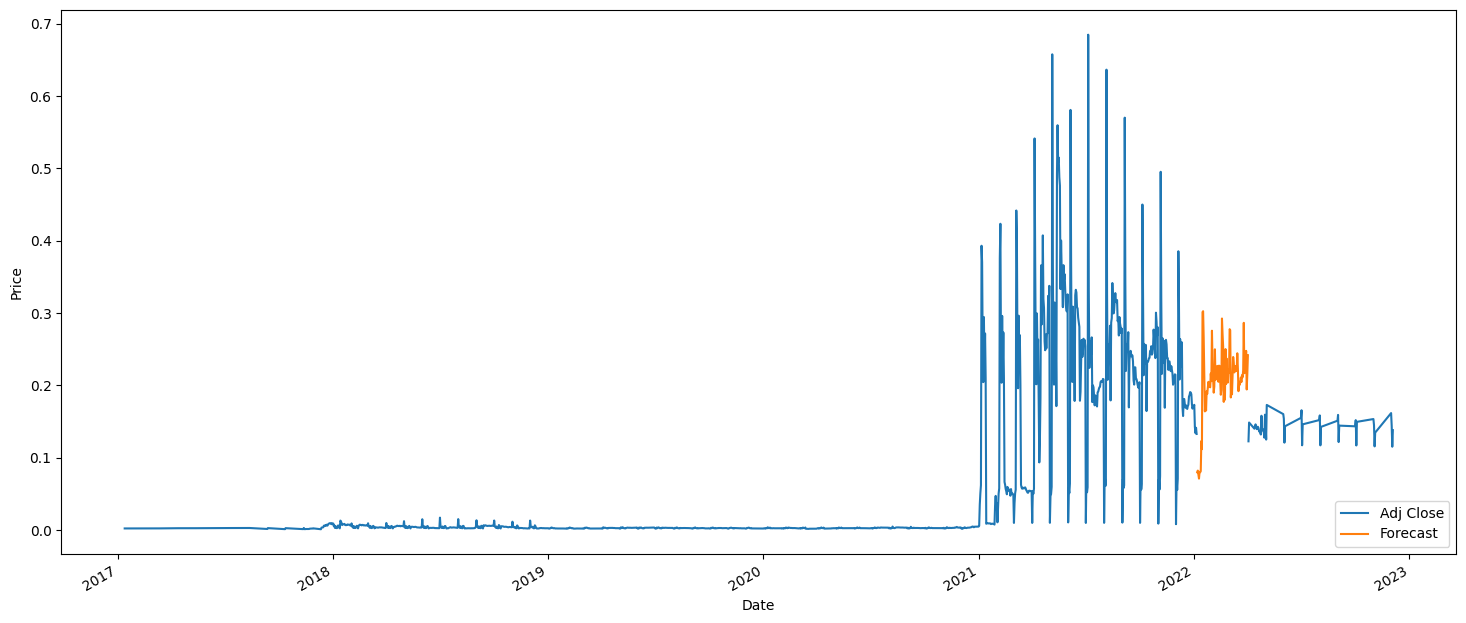

In [20]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Prediksi selanjutnya digambarkan dalam grafik yang berwarna orange